# Do your work for this exercise in a jupyter notebook named modeling within the regression-exercises repo. Add, commit, and push your work.

In [1]:
# lets grab some imports to do our work:
import numpy as np
import pandas as pd
# data source
from pydataset import data
# visualizations:
import matplotlib.pyplot as plt
import seaborn as sns
# modeling:
# data splitting:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression, TweedieRegressor, LassoLars
from sklearn.metrics import mean_squared_error, explained_variance_score
from sklearn.preprocessing import PolynomialFeatures

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# statistical testing:
from scipy import stats

## 1. Select a dataset with a continuous target variable.

In [4]:
df = data('swiss')
df.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6


In [5]:
len(df)

47

In [6]:
df.describe()


,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
count,47.000000,47.000000,47.000000,47.000000,47.00000,47.000000
mean,70.142553,50.659574,16.489362,10.978723,41.14383,19.942553
std,12.491697,22.711218,7.977883,9.615407,41.70485,2.912697
min,35.000000,1.200000,3.000000,1.000000,2.15000,10.800000
25%,64.700000,35.900000,12.000000,6.000000,5.19500,18.150000
50%,70.400000,54.100000,16.000000,8.000000,15.14000,20.000000
75%,78.450000,67.650000,22.000000,12.000000,93.12500,21.700000
max,92.500000,89.700000,37.000000,53.000000,100.00000,26.600000


## 2. Be sure your data is prepared (no missing values, numeric datatypes) and split into samples.

In [7]:
df = df.dropna()
len(df)

47

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47 entries, Courtelary to Rive Gauche
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Fertility         47 non-null     float64
 1   Agriculture       47 non-null     float64
 2   Examination       47 non-null     int64  
 3   Education         47 non-null     int64  
 4   Catholic          47 non-null     float64
 5   Infant.Mortality  47 non-null     float64
dtypes: float64(4), int64(2)
memory usage: 2.6+ KB


## 3. Work through all of the steps outlined in the lesson, from setting the baseline to selected a model and evaluating the final model on your test data.

In [9]:
# creating functions to get features under object items and numeric items

def get_object_cols(df):
    '''
    This function takes in a dataframe and identifies the columns that are object types
    and returns a list of those column names. 
    '''
    # get a list of the column names that are objects (from the mask)
    object_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
    
    return object_cols


def get_numeric_cols(df):
    '''
    This function takes in a dataframe and identifies the columns that are object types
    and returns a list of those column names. 
    '''
    # get a list of the column names that are objects (from the mask)
    num_cols = df.select_dtypes(exclude=['object', 'category']).columns.tolist()
    
    return num_cols

In [10]:
obj_cols = get_object_cols(df)

In [11]:
df_dummy = pd.get_dummies(columns=obj_cols, data=df)

In [12]:
df_dummy.columns

Index(['Fertility', 'Agriculture', 'Examination', 'Education', 'Catholic',
       'Infant.Mortality'],
      dtype='object')

In [13]:
df_dummy.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6


In [14]:
#create a function to split our data
def split_data(df):
    '''
    This function takes in a dataframe and splits the data,
    returning three pandas dataframes, train, test, and validate
    '''
    
    # Create train_validate and test datasets
    train_validate, test = train_test_split(df, test_size=0.2, random_state=1349)
    
    # Create train and validate datsets
    train, validate = train_test_split(train_validate, test_size=0.3, random_state=1349)

    # Take a look at your split datasets

    print(f"""
    train -> {train.shape}
    validate -> {validate.shape}
    test -> {test.shape}""")
    
    return train, validate, test

In [15]:
#create a function to isolate the target variable
def X_y_split(df, target):
    '''
    This function takes in a dataframe and a target variable
    Then it returns the X_train, y_train, X_validate, y_validate, X_test, y_test
    and a print statement with the shape of the new dataframes
    '''  
    train, validate, test = split_data(df)

    X_train = train.drop(columns= target)
    y_train = train[target]

    X_validate = validate.drop(columns= target)
    y_validate = validate[target]

    X_test = test.drop(columns= target)
    y_test = test[target]
        
    # Have function print datasets shape
    print(f'''
    X_train -> {X_train.shape}
    X_validate -> {X_validate.shape}
    X_test -> {X_test.shape}''') 
    
    return X_train, y_train, X_validate, y_validate, X_test, y_test

In [16]:
train, validate, test = split_data(df_dummy)


    train -> (25, 6)
    validate -> (12, 6)
    test -> (10, 6)


In [17]:
X_train, y_train, X_validate, y_validate, X_test, y_test = X_y_split(df_dummy, 'Infant.Mortality')


    train -> (25, 6)
    validate -> (12, 6)
    test -> (10, 6)

    X_train -> (25, 5)
    X_validate -> (12, 5)
    X_test -> (10, 5)


## checking distribution

In [18]:
train.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Le Locle,72.7,16.7,22,13,11.22,18.9
V. De Geneve,35.0,1.2,37,53,42.34,18.0
Broye,83.8,70.2,16,7,92.85,23.6
Nyone,56.6,50.9,22,12,15.14,16.7
Neuveville,76.9,43.5,17,15,5.16,20.6


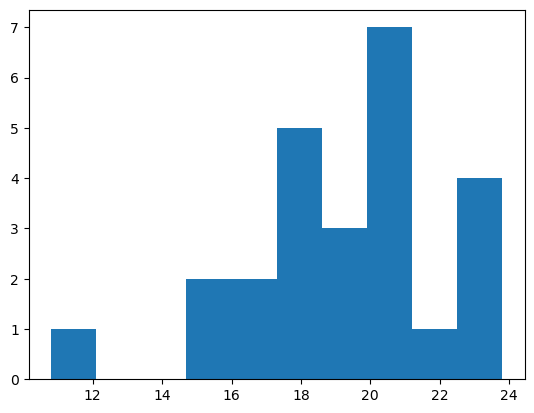

In [19]:
plt.hist(y_train)
# plt.xlabel("City")
# plt.ylabel("Number of Students")
plt.show()

# Scaling

In [20]:
from sklearn.preprocessing import MinMaxScaler

In [21]:
def scale_data(train, 
               validate, 
               test, 
               to_scale):
    #make copies for scaling
    train_scaled = train.copy()
    validate_scaled = validate.copy()
    test_scaled = test.copy()

    #scale them!
    #make the thing
    scaler = MinMaxScaler()

    #fit the thing
    scaler.fit(train[to_scale])

    #use the thing
    train_scaled[to_scale] = scaler.transform(train[to_scale])
    validate_scaled[to_scale] = scaler.transform(validate[to_scale])
    test_scaled[to_scale] = scaler.transform(test[to_scale])
    
    return train_scaled, validate_scaled, test_scaled

In [22]:
to_scale = X_train.columns.tolist()

In [23]:
X_train_scaled, X_validate_scaled, X_test_scaled = scale_data(X_train, X_validate, X_test, to_scale)

## Bivariate Data

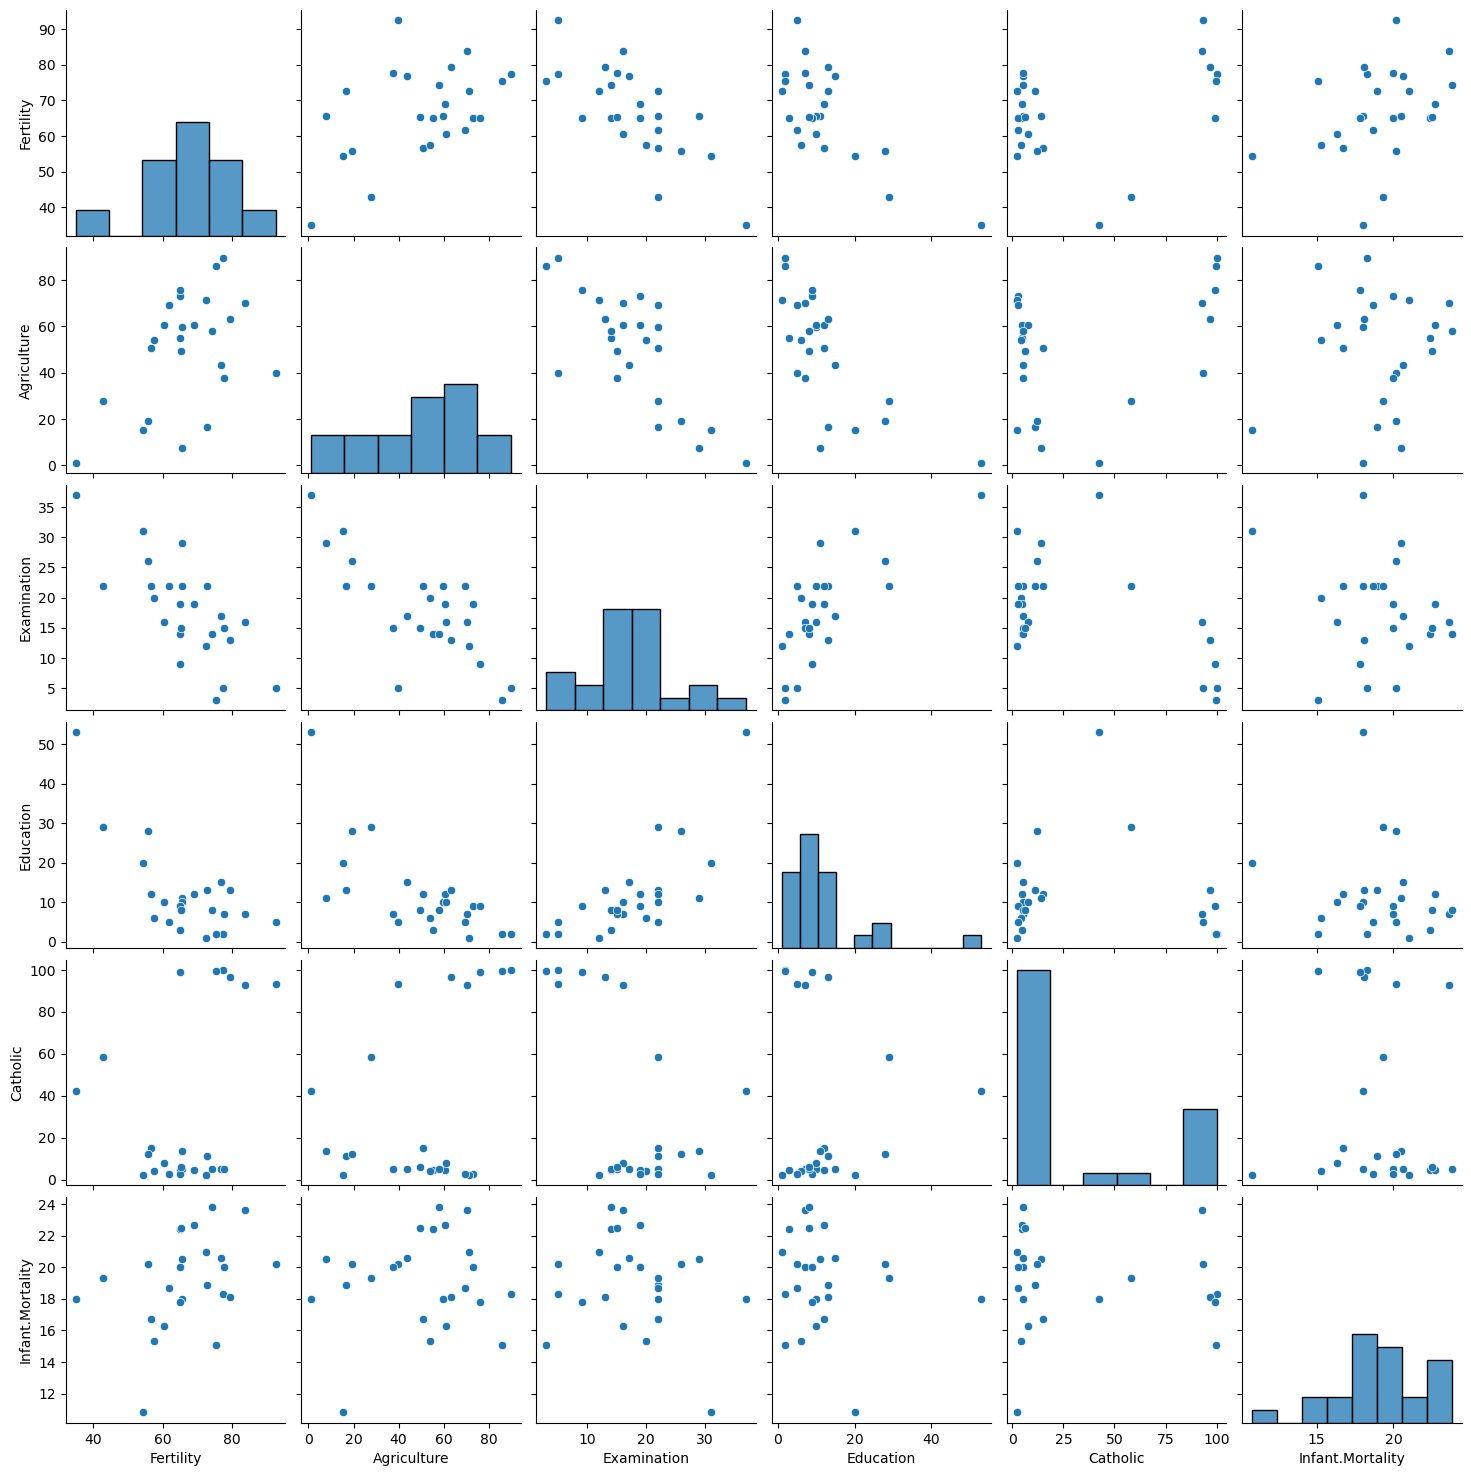

In [24]:
sns.pairplot(train)

## Hypothesis Testing

### Fertility vs Infant Mortaility

In [25]:
# H0: There is no correlation between Fertility and Infant Mortality
alpha = 0.05

r, p = stats.pearsonr(train['Fertility'], train['Infant.Mortality'])

print(f'The correlation coefficient ia {r}') # correlation coefficient measures the strength and direction of 
                                             # the linear relationship between two continuous variables.
    
print(f'The p-value is {p}')# f the p-value is less than the significance level 

if p < alpha:
    print(f'P is less than alpha (0.05) and CAN reject the Null Hypothesis')
else:
    print(f'P is not less than alpha (0.05) and CANNOT reject the Null Hypothesis')

The correlation coefficient ia 0.3581023820654395
The p-value is 0.07880379979561662
P is not less than alpha (0.05) and CANNOT reject the Null Hypothesis


### Catholic vs Infant Mortality

In [26]:
# H0: There is no correlation between Catholic and Infant Mortality
alpha = 0.05

r, p = stats.pearsonr(train['Catholic'], train['Infant.Mortality'])

print(f'The correlation coefficient ia {r}') # correlation coefficient measures the strength and direction of 
                                             # the linear relationship between two continuous variables.
    
print(f'The p-value is {p}')# f the p-value is less than the significance level 

if p < alpha:
    print(f'P is less than alpha (0.05) and CAN reject the Null Hypothesis')
else:
    print(f'P is not less than alpha (0.05) and CANNOT reject the Null Hypothesis')

The correlation coefficient ia -0.08321660646517849
The p-value is 0.6924973275765579
P is not less than alpha (0.05) and CANNOT reject the Null Hypothesis


## Testing the features 

In [27]:
from sklearn.feature_selection import RFE, SelectKBest, f_regression

In [28]:
#creating a funciton to use RFE
def rfe_model(X_scaled, y, number_of_features):
    
    lm = LinearRegression()
    
    # MAKE the thing
    rfe = RFE(lm, n_features_to_select=number_of_features) # the n_features_to_select= needs to have a value equal to
    
    # FIT the thing
    rfe.fit(X_scaled, y)
    
    X_scaled.columns[rfe.support_].tolist()# .support the same as .get_support()
    
    return X_scaled.columns[rfe.support_].tolist()
    

In [29]:
rfe_model(X_train_scaled, y_train, 3)

['Fertility', 'Examination', 'Education']

In [30]:
rfe_col = rfe_model(X_train_scaled, y_train, 3)

In [31]:
# creating the function
# X = X_train_scaled, y = y_train, 
# number_of_features = number of features to select as top fatures

def select_kbest(X_scaled, y, number_of_features):
    
    #MAKE the thing
    kbest = SelectKBest(f_regression, k=number_of_features)

    #FIT the thing
    kbest.fit(X_scaled, y)
    
    
    #create the mask
    feature_mask = kbest.get_support()

    #now we are going to ask for the column names of select k best top 2 features
    X_scaled.columns[feature_mask]
    
    return X_scaled.columns[feature_mask]

In [32]:
select_kbest(X_train_scaled, y_train, 3)

Index(['Fertility', 'Examination', 'Education'], dtype='object')

In [33]:
kbest_col = select_kbest(X_train_scaled, y_train, 3).to_list()

## Modeling

### Choosing the median or the mean for baseline

# Step 1

In [34]:
# make y_train a DataFrame to abel to attach a new column
y_train = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)

# Step 2

### a. Apply to y_train data


In [35]:
# adding the baseline column to dataframe usng the mean and meadian of infant moratility as features
y_train['baseline_mean'] = y_train['Infant.Mortality'].mean()
y_train['baseline_median'] = y_train['Infant.Mortality'].median()

In [36]:
# scores:
rmse_mean = mean_squared_error(y_train['Infant.Mortality'],
                               y_train['baseline_mean'], squared=False) ** .5
rmse_med = mean_squared_error(y_train['Infant.Mortality'],
                               y_train['baseline_median'], squared=False) ** .5

rmse_mean, rmse_med

if rmse_mean < rmse_med:
    print(f'Mean wins')
    display(y_train.head())
else:
    print(f'Median wins')
    display(y_train.head())

Mean wins


,Infant.Mortality,baseline_mean,baseline_median
Le Locle,18.9,19.152,19.3
V. De Geneve,18.0,19.152,19.3
Broye,23.6,19.152,19.3
Nyone,16.7,19.152,19.3
Neuveville,20.6,19.152,19.3


### b. Apply to y_validate data

In [37]:
y_validate['baseline_mean'] = y_train['Infant.Mortality'].mean()

y_validate['baseline_median'] = y_train['Infant.Mortality'].median()

---

In [38]:
y_validate.head(1)

,Infant.Mortality,baseline_mean,baseline_median
Courtelary,22.2,19.152,19.3


In [39]:
y_train.head(1)

,Infant.Mortality,baseline_mean,baseline_median
Le Locle,18.9,19.152,19.3


# RMSE of Mean baseline

# Step 3

In [40]:
rmse_train_mean = mean_squared_error(y_train['Infant.Mortality'], y_train.baseline_mean) ** .5

rmse_validate_mean = mean_squared_error(y_validate['Infant.Mortality'], y_validate.baseline_mean) ** .5

print(f"""RMSE using Mean\nTrain/In-Sample: {round(rmse_train_mean, 2)} 
Validate/Out-of-Sample: {round(rmse_validate_mean, 2)}""")

RMSE using Mean
Train/In-Sample: 2.89 
Validate/Out-of-Sample: 2.38


In [41]:
# Let's house our metrics in a df to later compare
metric_df = pd.DataFrame(data = [
        {
            "model": "mean_baseline",
            "RMSE_train": rmse_train_mean,
            "RMSE_validate":rmse_validate_mean,
            "R2_validate": explained_variance_score(y_validate['Infant.Mortality'], y_validate.baseline_mean)
        }
])

In [42]:
rmse_train_median = mean_squared_error(y_train['Infant.Mortality'], y_train.baseline_median) ** .5

rmse_validate_median = mean_squared_error(y_validate['Infant.Mortality'], y_validate.baseline_median) ** .5

print(f"""RMSE using Mean\nTrain/In-Sample: {round(rmse_train_median, 2)} 
Validate/Out-of-Sample: {round(rmse_validate_median, 2)}""")

RMSE using Mean
Train/In-Sample: 2.89 
Validate/Out-of-Sample: 2.34


# Step 4

In [43]:
# Let's house our metrics in a df to later compare
metric_df = pd.DataFrame(data = [
        {
            "model": "median_baseline",
            "RMSE_train": rmse_train_mean,
            "RMSE_validate":rmse_validate_mean,
            "R2_validate": explained_variance_score(y_validate['Infant.Mortality'], y_validate.baseline_mean)
        }
])

In [44]:
metric_df

,model,RMSE_train,RMSE_validate,R2_validate
0,median_baseline,2.887645,2.384562,0.0


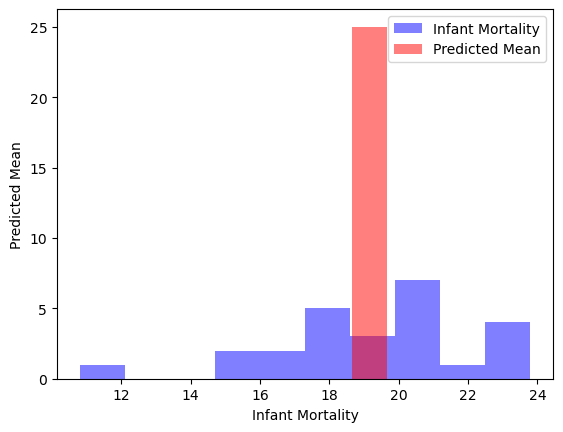

In [45]:
# plot to visualize actual vs predicted. 

plt.hist(y_train['Infant.Mortality'], color='blue', alpha=.5, label="Infant Mortality") # label adds the legen label
plt.hist(y_train.baseline_mean, bins=1, color='red', alpha=.5,  label="Predicted Mean")
#plt.hist(y_train.G3_pred_median, bins=1, color='orange', alpha=.5, label="Predicted Final Grades - Median")
plt.xlabel("Infant Mortality")
plt.ylabel("Predicted Mean")
plt.legend()
plt.show()

# LinearRegression (OLS)

In [46]:
# MAKE THE THING: create the model object
lm = LinearRegression()

#1. FIT THE THING: fit the model to training data
OLSmodel = lm.fit(X_train, y_train['Infant.Mortality'])

#2. USE THE THING: make a prediction
y_train['mortaility_pred_lm'] = lm.predict(X_train)

#3. Evaluate: RMSE
rmse_train = mean_squared_error(y_train['Infant.Mortality'], y_train.mortaility_pred_lm) ** .5

In [47]:
y_train.head(1)

,Infant.Mortality,baseline_mean,baseline_median,mortaility_pred_lm
Le Locle,18.9,19.152,19.3,19.875059


In [48]:
#4. REPEAT STEPS 2-3

# predict validate
y_validate['mortaility_pred_lm'] = lm.predict(X_validate)

# evaluate: RMSE
rmse_validate = mean_squared_error(y_validate['Infant.Mortality'], y_validate.mortaility_pred_lm) ** .5

print(f"""RMSE for OLS using LinearRegression
Training/In-Sample:  {rmse_train} 
Validation/Out-of-Sample: {rmse_validate}""")

RMSE for OLS using LinearRegression
Training/In-Sample:  2.463295499124062 
Validation/Out-of-Sample: 2.649474561762487


In [49]:
#Append this to the metric_df

metric_df = metric_df.append({
    "model":"OLS Regressor",
    "RMSE_train": rmse_train,
    "RMSE_validate": rmse_validate,
    "R2_validate": explained_variance_score(y_validate['Infant.Mortality'], y_validate.mortaility_pred_lm)
}, ignore_index=True)

In [50]:
metric_df

,model,RMSE_train,RMSE_validate,R2_validate
0,median_baseline,2.887645,2.384562,0.00000
1,OLS Regressor,2.463295,2.649475,-0.31361


# LassoLars 

In [51]:
# MAKE THE THING: create the model object
lars = LassoLars(alpha=1.0) # you can loop through for higher values to chane som hyperparameters

#1. FIT THE THING: fit the model to training data
# We must specify the column in y_train, since we have converted it to a dataframe from a series!
lars.fit(X_train, y_train['Infant.Mortality'])

#2. USE THE THING: make a prediction
y_train['mortaility_pred_lars'] = lars.predict(X_train)

#3. Evaluate: RMSE
rmse_train = mean_squared_error(y_train['Infant.Mortality'], y_train.mortaility_pred_lars) ** (1/2)

#4. REPEAT STEPS 2-3

# predict validate
y_validate['mortaility_pred_lars'] = lars.predict(X_validate)

# evaluate: RMSE
rmse_validate = mean_squared_error(y_validate['Infant.Mortality'], y_validate.mortaility_pred_lars) ** (1/2)

print(f"""RMSE for Lasso + Lars
_____________________
Training/In-Sample: {rmse_train}, 
Validation/Out-of-Sample:  {rmse_validate}
Difference:  {rmse_validate - rmse_train}""")

RMSE for Lasso + Lars
_____________________
Training/In-Sample: 2.511330133133229, 
Validation/Out-of-Sample:  2.4134229949271386
Difference:  -0.09790713820609032


In [52]:
#Append this to the metric_df

metric_df = metric_df.append({
    "model":"LassoLars",
    "RMSE_train": rmse_train,
    "RMSE_validate": rmse_validate,
    "R2_validate": explained_variance_score(y_validate['Infant.Mortality'], y_validate.mortaility_pred_lars)
}, ignore_index=True)

In [53]:
metric_df

,model,RMSE_train,RMSE_validate,R2_validate
0,median_baseline,2.887645,2.384562,0.000000
1,OLS Regressor,2.463295,2.649475,-0.313610
2,LassoLars,2.511330,2.413423,-0.075051


# TweedieRegressor


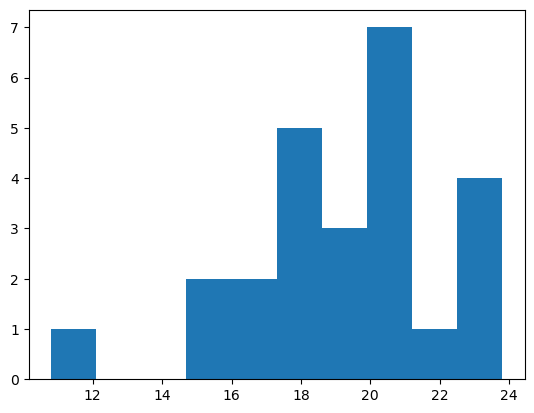

In [54]:
plt.hist(train['Infant.Mortality'])
plt.show()

In [55]:
# MAKE THE THING: create the model object
glm = TweedieRegressor(power=1, alpha=0) # loop through to change the power and alpha

#1. FIT THE THING: fit the model to training data
# We must specify the column in y_train, since we have converted it to a dataframe from a series!
glm.fit(X_train, y_train['Infant.Mortality'])

#2. USE THE THING: make a prediction
y_train['mortaility_pred_glm'] = glm.predict(X_train)

#3. Evaluate: RMSE
rmse_train = mean_squared_error(y_train['Infant.Mortality'], y_train.mortaility_pred_glm) ** .5

#4. REPEAT STEPS 2-3

# predict validate
y_validate['mortaility_pred_glm'] = glm.predict(X_validate)

# evaluate: RMSE
rmse_validate = mean_squared_error(y_validate['Infant.Mortality'], y_validate.mortaility_pred_glm) ** .5

print(f"""RMSE for GLM using Tweedie, power=1 & alpha=0
_____________________
Training/In-Sample: {rmse_train}, 
Validation/Out-of-Sample:  {rmse_validate}
Difference:  {rmse_validate - rmse_train}""")

RMSE for GLM using Tweedie, power=1 & alpha=0
_____________________
Training/In-Sample: 2.462195784852402, 
Validation/Out-of-Sample:  2.671423509660655
Difference:  0.2092277248082528


In [56]:
#Append this to the metric_df

metric_df = metric_df.append({
    "model":"Tweedie",
    "RMSE_train": rmse_train,
    "RMSE_validate": rmse_validate,
    "R2_validate": explained_variance_score(y_validate['Infant.Mortality'], y_validate.mortaility_pred_glm)
}, ignore_index=True)

In [57]:
metric_df

,model,RMSE_train,RMSE_validate,R2_validate
0,median_baseline,2.887645,2.384562,0.000000
1,OLS Regressor,2.463295,2.649475,-0.313610
2,LassoLars,2.511330,2.413423,-0.075051
3,Tweedie,2.462196,2.671424,-0.336047


# Polynomial Regression

In [58]:
#1. Create the polynomial features to get a new set of features
pf = PolynomialFeatures(degree=2) #Quadratic aka x-squared

#1. Fit and transform X_train_scaled
X_train_degree2 = pf.fit_transform(X_train)

#1. Transform X_validate_scaled & X_test_scaled 
X_validate_degree2 = pf.transform(X_validate)
X_test_degree2 = pf.transform(X_test)


In [59]:
#2.1 MAKE THE THING: create the model object
lm2 = LinearRegression()

#2.2 FIT THE THING: fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm2.fit(X_train_degree2, y_train['Infant.Mortality'])

#3. USE THE THING: predict train
y_train['mortaility_pred_lm2'] = lm2.predict(X_train_degree2)

#4. Evaluate: rmse
rmse_train = mean_squared_error(y_train['Infant.Mortality'], y_train.mortaility_pred_lm2) ** .5

#5. REPEAT STEPS 3-4

# predict validate
y_validate['mortaility_pred_lm2'] = lm2.predict(X_validate_degree2)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate['Infant.Mortality'], y_validate.mortaility_pred_lm2) ** .5

print(f"""RMSE for Polynomial Model, degrees=2
_____________________________________________
Training/In-Sample:  {rmse_train} 
Validation/Out-of-Sample:  {rmse_validate}""")

RMSE for Polynomial Model, degrees=2
_____________________________________________
Training/In-Sample:  0.5763417238354483 
Validation/Out-of-Sample:  7.2539773102987315


In [60]:
#Append
metric_df = metric_df.append({
    "model":"Polynomial",
    "RMSE_train": rmse_train,
    "RMSE_validate": rmse_validate,
    "R2_validate": explained_variance_score(y_validate['Infant.Mortality'], y_validate.mortaility_pred_lm2)
}, ignore_index=True)

In [61]:
metric_df

,model,RMSE_train,RMSE_validate,R2_validate
0,median_baseline,2.887645,2.384562,0.000000
1,OLS Regressor,2.463295,2.649475,-0.313610
2,LassoLars,2.511330,2.413423,-0.075051
3,Tweedie,2.462196,2.671424,-0.336047
4,Polynomial,0.576342,7.253977,-8.661849


# Evaluate

 ### Plotting Actual vs. Predicted Values

In [62]:
y_validate.head()

,Infant.Mortality,baseline_mean,baseline_median,mortaility_pred_lm,mortaility_pred_lars,mortaility_pred_glm,mortaility_pred_lm2
Courtelary,22.2,19.152,19.3,21.739147,21.064516,21.783861,24.383735
Vevey,20.9,19.152,19.3,18.189940,18.465648,18.143879,21.069595
Delemont,22.2,19.152,19.3,20.438349,19.949798,20.379571,27.009355
Aubonne,19.1,19.152,19.3,20.244794,19.764040,20.214306,19.603321
Aigle,16.5,19.152,19.3,19.613184,19.534353,19.580099,19.777758


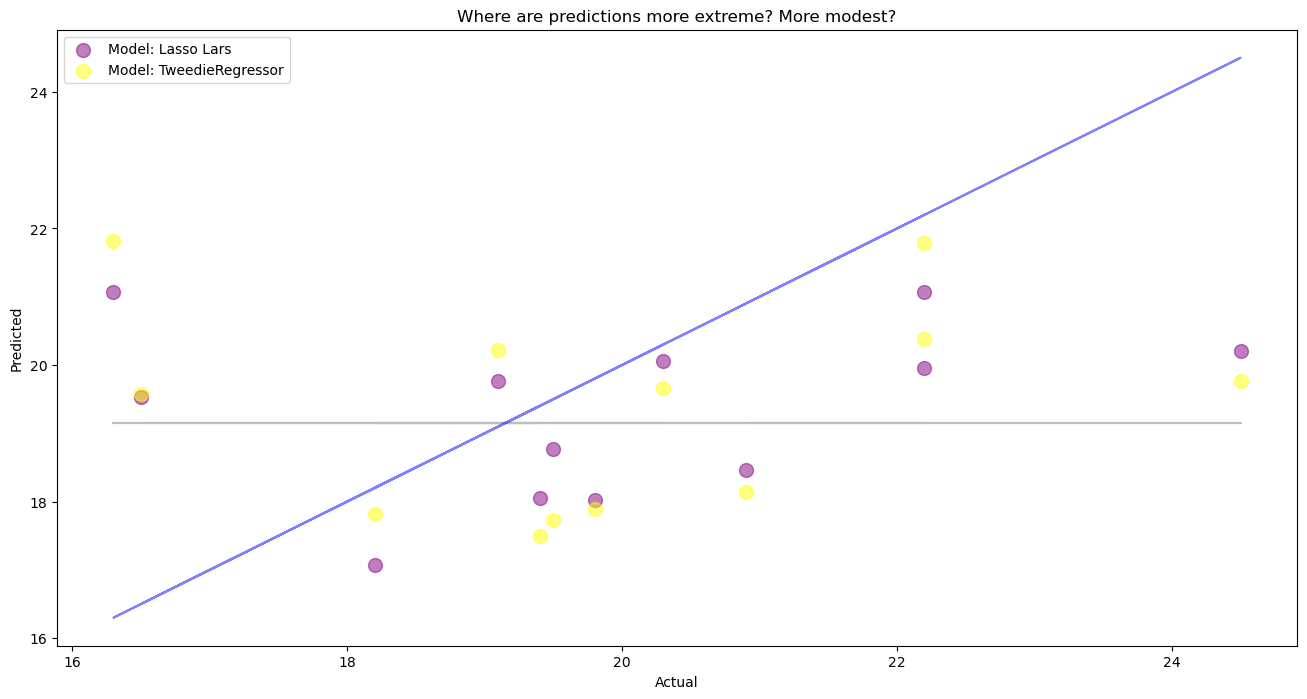

In [63]:
plt.figure(figsize=(16,8))
#actual vs mean
plt.plot(y_validate['Infant.Mortality'], y_validate.baseline_mean, alpha=.5, color="gray", label='_nolegend_')
plt.annotate("Baseline: Predict Using Mean", (16, 9.5))

#actual vs. actual
plt.plot(y_validate['Infant.Mortality'], y_validate['Infant.Mortality'], alpha=.5, color="blue", label='_nolegend_')
plt.annotate("The Ideal Line: Predicted = Actual", (.5, 3.5), rotation=15.5)

#actual vs. LinearReg model
# plt.scatter(y_validate['Infant.Mortality'], y_validate.mortaility_pred_lm, 
#             alpha=.5, color="red", s=100, label="Model: LinearRegression")
#actual vs. LassoLars model
plt.scatter(y_validate['Infant.Mortality'], y_validate.mortaility_pred_lars, 
            alpha=.5, color="purple", s=100, label="Model: Lasso Lars")
#actual vs. Tweedie/GenLinModel
plt.scatter(y_validate['Infant.Mortality'], y_validate.mortaility_pred_glm, 
            alpha=.5, color="yellow", s=100, label="Model: TweedieRegressor")
#actual vs. PolynomReg/Quadratic
# plt.scatter(y_validate['Infant.Mortality'], y_validate.mortaility_pred_lm2, 
#             alpha=.5, color="green", s=100, label="Model 2nd degree Polynomial")
plt.legend()
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Where are predictions more extreme? More modest?")
plt.show()

In [64]:
len(y_validate)

12

In [65]:
# removed the worst performing models

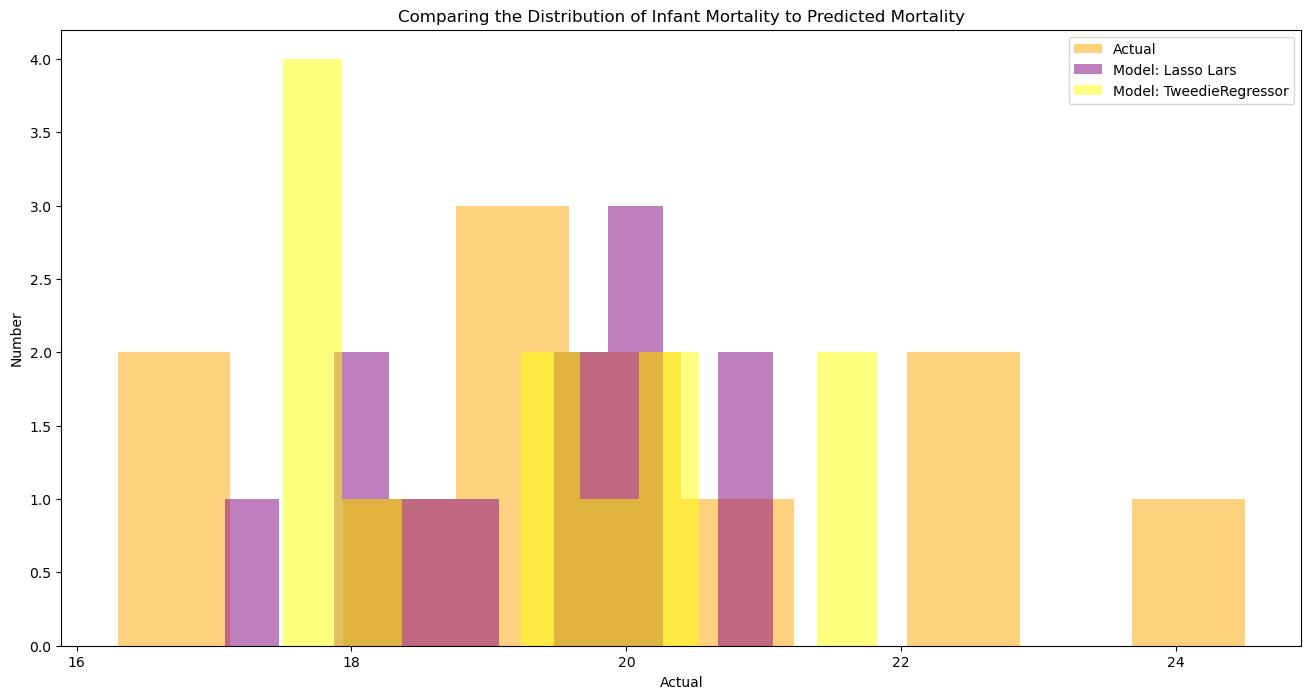

In [66]:
# plot to visualize actual vs predicted. 
plt.figure(figsize=(16,8))

plt.hist(y_validate['Infant.Mortality'], color='orange', alpha=.5, label="Actual")
# plt.hist(y_validate.mortaility_pred_lm, color='red', alpha=.5, label="Model: LinearRegression")
plt.hist(y_validate.mortaility_pred_lars, color='purple', alpha=.5, label="Model: Lasso Lars")
plt.hist(y_validate.mortaility_pred_glm, color='yellow', alpha=.5, label="Model: TweedieRegressor")
# plt.hist(y_validate.mortaility_pred_lm2, color='green', alpha=.5, label="Model 2nd degree Polynomial")

plt.xlabel("Actual")
plt.ylabel("Number")
plt.title("Comparing the Distribution of Infant Mortality to Predicted Mortality")
plt.legend()
plt.show()

In [67]:
metric_df

,model,RMSE_train,RMSE_validate,R2_validate
0,median_baseline,2.887645,2.384562,0.000000
1,OLS Regressor,2.463295,2.649475,-0.313610
2,LassoLars,2.511330,2.413423,-0.075051
3,Tweedie,2.462196,2.671424,-0.336047
4,Polynomial,0.576342,7.253977,-8.661849


# Model Selection & Out-of-Sample Evaluation

### Model selected: lars (using Lasso lars with alpha = 1.0)

In [68]:
# Convert y_test Series to a df
y_test = pd.DataFrame(y_test)

# USE THE THING: predict on test
y_test['mortaility_pred_lars'] = lars.predict(X_test)

# Evaluate: rmse
rmse_test = mean_squared_error(y_test['Infant.Mortality'], y_test.mortaility_pred_lars) ** (.5)

print(f"""RMSE for LassoLars alpha=1.0
_____________________________________________      
Out-of-Sample Performance: {rmse_test}
Baseline: {y_train['Infant.Mortality'].mean()}""")

RMSE for LassoLars alpha=1.0
_____________________________________________      
Out-of-Sample Performance: 3.462334481775586
Baseline: 19.152


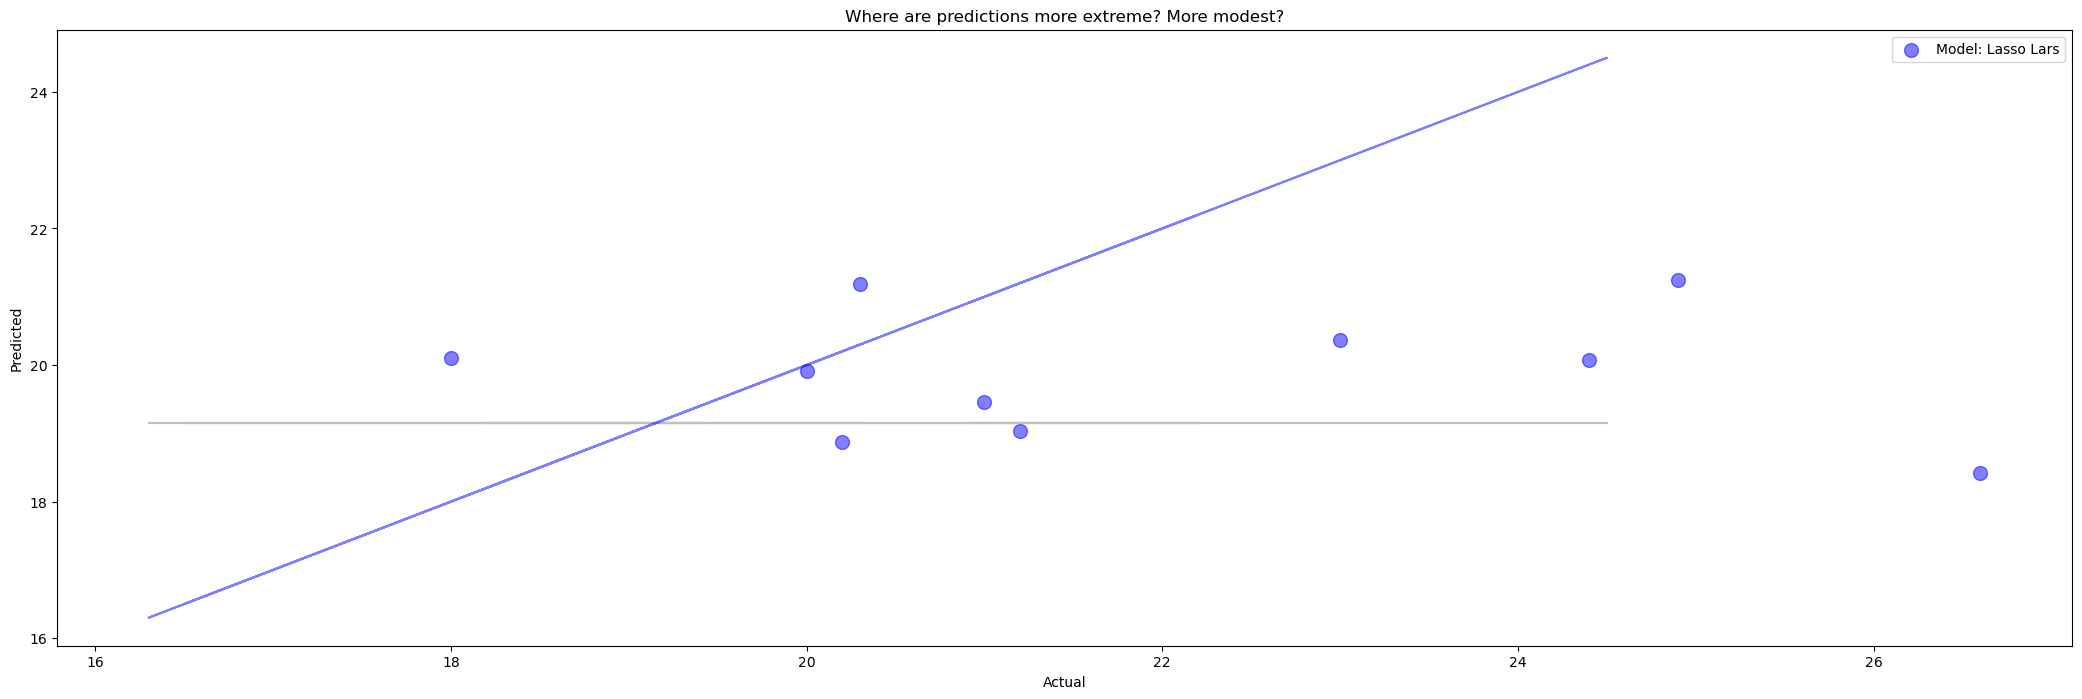

In [71]:
plt.figure(figsize=(26,8))
#actual vs mean
plt.plot(y_validate['Infant.Mortality'], y_validate.baseline_mean, alpha=.5, color="gray", label='_nolegend_')
plt.annotate("Baseline: Predict Using Mean", (16, 9.5))

#actual vs. actual
plt.plot(y_validate['Infant.Mortality'], y_validate['Infant.Mortality'], alpha=.5, color="blue", label='_nolegend_')
plt.annotate("The Ideal Line: Predicted = Actual", (.5, 3.5), rotation=15.5)

plt.scatter(y_test['Infant.Mortality'], y_test.mortaility_pred_lars, 
            alpha=.5, color="blue", s=100, label="Model: Lasso Lars")
plt.legend()
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Where are predictions more extreme? More modest?")
plt.show()

In [70]:
y_test

,Infant.Mortality,mortaility_pred_lars
Monthey,20.2,18.875842
Neuchatel,23.0,20.369359
Porrentruy,26.6,18.423313
Glane,24.9,21.247592
Echallens,21.2,19.033105
Sarine,24.4,20.073551
Gruyere,21.0,19.457935
Grandson,20.0,19.913467
Paysd'enhaut,18.0,20.099669
Moutier,20.3,21.193303
